# ZUNAJRAVNINSKI GRAFI (OUTERPLANAR GRAPHS)

## Navodila za uporabo programa

### Predpogoj za uporabo
Potrebno je imeti nameščen SageMath.

### Navodila za uporabo
Poganjajte vrstice po vrsti.

### Cilj naloge
Za zunajravninske grafe želimo preveriti neenakost: $\alpha_{od}(G) \le n/7$.

### Struktura programa
1. Funkcija alpha_od(G)
2. Funkcija, ki za dan graf preveri, ali je zunajravninski
3. Iskanje števila zunajravninskih grafov in preverjanje neenakosti za male $n$ ($n \le 10$)
4. Generiranje naključnega zunajravninskega grafa na n vozliščih
5. Generiranje zunajravninskih grafov in preverjanje zgornje neenakosti za grafe s številom vozlišč med $n$ in $m$
6. Pognana funkcija za $n = 1$ in $m = 50$ in izpis rezultatov

# 1. Funkcija alpha_od(G)
Za preverjanje najinega problema sva si sposodila funkcijo, ki z linearnim programom izračuna liho neodvisno množico danega grafa.
Funkcija je bila napisana v prejšnji skupini projektov.

In [13]:
def alpha_od(G):
    """
    Funkcija, ki izračuna največjo moč lihe neodvisne množice grafa G.
    """
    from sage.numerical.mip import MixedIntegerLinearProgram
    
    n = G.order()
    V = G.vertices()
    
    # Create the mixed integer linear program
    mip = MixedIntegerLinearProgram(maximization=True)
    
    # Define variables
    x = mip.new_variable(binary=True) # Indicator if vertex v is in the independent set
    y = mip.new_variable(binary=True) # Indicator if vertex v has neighbors in the independent set
    z = mip.new_variable(integer=True) # Counter for the vertex v
    
    # Objective function
    mip.set_objective(mip.sum(x[v] for v in V))
    
    # Constraints
    for u, v in G.edges(labels=False):
        mip.add_constraint(x[u] + x[v] <= 1)
        
    for u in V:
        sum_neighbors = mip.sum(x[v] for v in G.neighbors(u))
        mip.add_constraint(sum_neighbors <= n * y[u])
        mip.add_constraint(y[u] + sum_neighbors == 2*z[u])
    
    # Solve the MIP
    return int(mip.solve())

Preverimo delovanje funkcije:

In [2]:
from sage.all import Graph
from sage.graphs.graph_generators import graphs

P4 = graphs.PathGraph(4)
C4 = graphs.CycleGraph(4)
C5 = graphs.CycleGraph(5)

for name, G in [("P4", P4), ("C4", C4), ("C5", C5)]:
    print(name, "alpha_od =", alpha_od(G))

P4 alpha_od = 2
C4 alpha_od = 1
C5 alpha_od = 1


# 2. Funkcija, ki za dan graf preveri, ali je zunajravninski

Uporabimo lahko vgrajeno metodo *is_circular_planar*, saj za vsak zunajravninski graf velja, da ga lahko narišemo kot circular planar - krožno ravninski graf.

In [ ]:
def preveri_outerplanarnost(G):
    """
    Funkcija, ki preveri, ali je graf G zunajravninski. Graf G mora biti neusmerjen in enostaven.
    """
    if G.is_directed():
        raise ValueError("Pričakovan je neusmerjen graf.")
    if G.has_loops() or G.has_multiple_edges():
        raise ValueError("Graf mora biti enostaven.")

    return G.is_circular_planar()

Preverimo funkcijo na nekaj grafih.

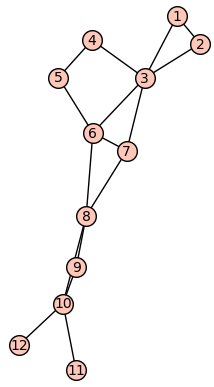

Graf G je outerplanaren.


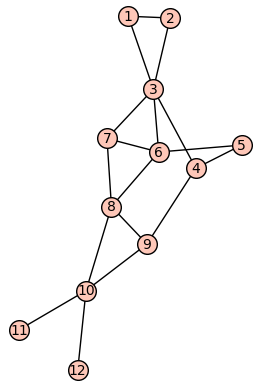

Graf F ni outerplanaren.


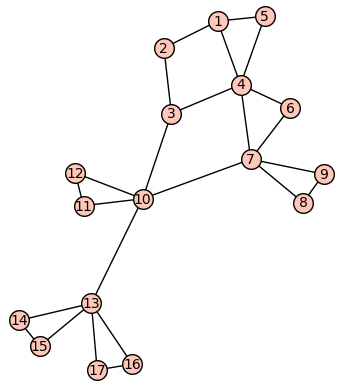

Graf H je outerplanaren.


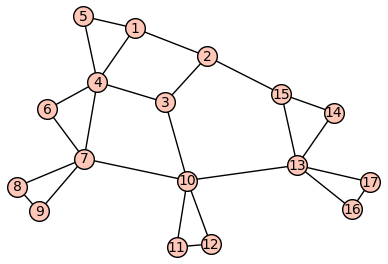

Graf I ni outerplanaren.


In [4]:
G = Graph({1:[2,3],2:[1,3],3:[4,6,7],4:[3,5],5:[4,6],6:[3,5,7],7:[3,6,8],8:[6,7,9,10],9:[8,10],10:[8,9,11,12],11:[10],12:[10]})
F = Graph({1:[2,3],2:[1,3],3:[4,6,7],4:[3,5,9],5:[4,6],6:[3,5,7],7:[3,6,8],8:[6,7,9,10],9:[4,8,10],10:[8,9,11,12],11:[10],12:[10]})
H = Graph({1:[2,4,5],2:[1,3],3:[2,10],4:[1,3,5,6,7],5:[1,4],6:[4,7],7:[4,6,8,9,10],8:[7,9],9:[7,8],
           10:[3,7,11,12,13],11:[10,12],12:[10,11],13:[10,14,15,16,17],14:[13,15],15:[13,14],16:[13,17],17:[13,16]})
I = Graph({1:[2,4,5],2:[1,3,15],3:[2,10],4:[1,3,5,6,7],5:[1,4],6:[4,7],7:[4,6,8,9,10],8:[7,9],9:[7,8],
           10:[3,7,11,12,13],11:[10,12],12:[10,11],13:[10,14,15,16,17],14:[13,15],15:[13,14],16:[13,17],17:[13,16]})

for ime, graf in [("G", G), ("F", F), ("H", H), ("I", I)]:
    graf.show()
    if preveri_outerplanarnost(graf):
        print(f"Graf {ime} je outerplanaren.")
    else:
        print(f"Graf {ime} ni outerplanaren.") 
    

# 2. Iskanje števila zunajravninskih grafov in preverjanje neenakosti za male $n$ ($n \le 10$)

Najprej želimo dobiti seznam vseh zunajravninskih grafov na n vozliščih. Za hitrejše delovanje funkcije bomo uporabili program *Plantri*, ki nam omogoča dostop do vseh ravninskih grafov, kar občutno zmanjša časovno zahtevnost programa. Za hitrejšo izvedbo pa tudi uporabimo kanoničen zapis za grafe, kar nam omogoča, da ni potrebno dodatno preverjati izomorfnost grafov.

In [ ]:
def outerplanar_graphs(n):
    """
    Funkcija, ki vrne seznam vseh zunajravninskih grafov z n vozlišči.
    """
    OP = []
    seen = set()

    if n == 1:
        return [Graph({1:[]})]

    for G in graphs.planar_graphs(n):
        if G.size() > 2*n - 3:
            continue
        if preveri_outerplanarnost(G):
            canon = G.canonical_label()
            if canon.graph6_string() not in seen:
                seen.add(canon.graph6_string())
                OP.append(canon)
    return OP

In [7]:
for n in range(1, 11):
    if n == 1:
        print(f"Število zunajravninskih grafov na {n} vozlišču je 1.")
    else:
        print(f"Število zunajravninskih grafov na {n} vozliščih je {len(outerplanar_graphs(n))}.")


Število zunajravninskih grafov na 1 vozlišču je 1.
Število zunajravninskih grafov na 2 vozliščih je 1.
Število zunajravninskih grafov na 3 vozliščih je 2.
Število zunajravninskih grafov na 4 vozliščih je 5.
Število zunajravninskih grafov na 5 vozliščih je 13.
Število zunajravninskih grafov na 6 vozliščih je 46.
Število zunajravninskih grafov na 7 vozliščih je 172.
Število zunajravninskih grafov na 8 vozliščih je 777.
Število zunajravninskih grafov na 9 vozliščih je 3783.
Število zunajravninskih grafov na 10 vozliščih je 20074.


Za prvih nekaj n se zgornja koda izvede v nekaj sekundah, pri n = 9 traja slabi 2 minuti, za n = 10 pa že približno 30 minut.

In [ ]:
def prikazi_grafe(n, k):
    """ 
    Prikaže naključno izbranih k zunajravninskih grafov na n vozliščih. 
    """
    from random import sample
    
    grafi = sample(outerplanar_graphs(n), k)
    print(f"{k} zunajravninskih grafov na {n} vozliščih:")
    for G in grafi:
        alpha = alpha_od(G)
        G.show()
        print(f"alpha_od = {alpha}")

5 zunajravninskih grafov na 10 vozliščih:


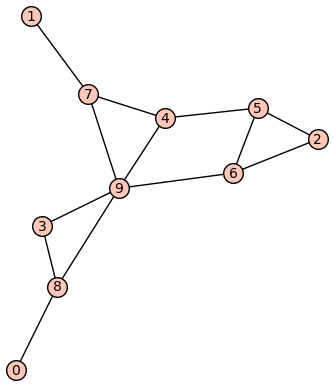

alpha_od = 3


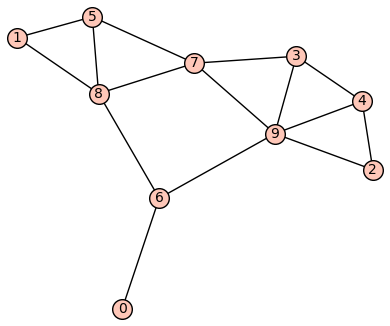

alpha_od = 3


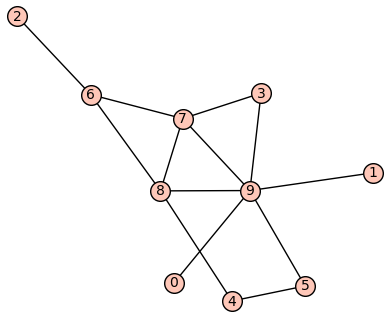

alpha_od = 5


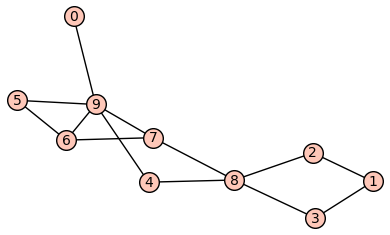

alpha_od = 4


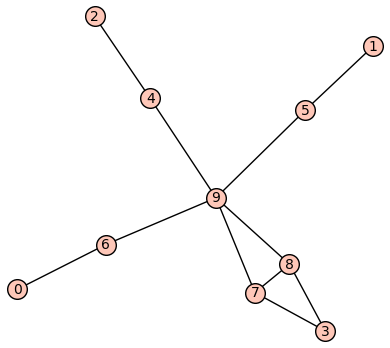

alpha_od = 4


In [8]:
prikazi_grafe(10, 5)

Shranimo vse zunajravninske grafe na $n \le 10$ vozliščih. 

In [17]:
slovar_zunajravninskih_grafov = {n: outerplanar_graphs(n) for n in range(1, 11)}

In [21]:
len(slovar_zunajravninskih_grafov[10])

20074

In [ ]:
def check_alpha_do_n(max_n=10):
    """ 
    Funkcija preveri neenakost alpha_od(G) >= n/7 za vse zunajravninske grafe do n=10 vozlišč.
    """
    for n, OP in slovar_zunajravninskih_grafov.items():
        for G in OP:
            alpha = alpha_od(G)
            if alpha < n / 7:
                print("Protiprimer najden!")
                print(f"n = {n}")
                print(f"alpha_od(G) = {alpha} < {n}/7")
                G.show()
                return False
            
        print(f"Vsi grafi za n = {n} zadoščajo neenakosti.")



In [25]:
check_alpha_do_n(10)

Vsi grafi za n = 1 zadoščajo neenakosti.
Vsi grafi za n = 2 zadoščajo neenakosti.
Vsi grafi za n = 3 zadoščajo neenakosti.
Vsi grafi za n = 4 zadoščajo neenakosti.
Vsi grafi za n = 5 zadoščajo neenakosti.
Vsi grafi za n = 6 zadoščajo neenakosti.
Vsi grafi za n = 7 zadoščajo neenakosti.
Vsi grafi za n = 8 zadoščajo neenakosti.
Vsi grafi za n = 9 zadoščajo neenakosti.
Vsi grafi za n = 10 zadoščajo neenakosti.


Poglejmo si sedaj za vsak $n$, koliko je takih grafov, ki imajo minimalno število $\alpha_{od}$.

In [38]:
def grafi_z_min_alpha(slovar_grafov, n_max=10):
    """
    Za vsak n = 1,...,n_max izpiše in vrne število zunajravninskih grafov,
    ki imajo minimalni alpha_od za ta n.
    """
    rezultat = {}

    for n in range(1, n_max + 1):
        grafi = slovar_grafov[n]
        vrednosti = [alpha_od(G) for G in grafi]
        min_alpha = min(vrednosti)
        stevilo = sum(1 for a in vrednosti if a == min_alpha)
        rezultat[n] = (min_alpha, stevilo)

        print(
            f"n = {n}: "
            f"min alpha_od = {min_alpha}, "
            f"število grafov = {stevilo}"
        )


In [39]:
grafi_z_min_alpha(slovar_zunajravninskih_grafov, n_max=10)

n = 1: min alpha_od = 1, število grafov = 1
n = 2: min alpha_od = 1, število grafov = 1
n = 3: min alpha_od = 1, število grafov = 2
n = 4: min alpha_od = 1, število grafov = 3
n = 5: min alpha_od = 1, število grafov = 5
n = 6: min alpha_od = 1, število grafov = 4
n = 7: min alpha_od = 1, število grafov = 2
n = 8: min alpha_od = 2, število grafov = 204
n = 9: min alpha_od = 2, število grafov = 428
n = 10: min alpha_od = 2, število grafov = 687


In [42]:
import random

def narisi_nakljucni_ekstremni_graf(slovar_grafov, n_min, n_max=10):
    """
    Funkcija, ki za vsak n v intervalu [n_min, n_max] naključno izbere en zunajravninski graf
    z minimalnim alpha_od in ga nariše.
    """
    for n in range(n_min, n_max + 1):
        grafi = slovar_grafov[n]

        vrednosti = [(G, alpha_od(G)) for G in grafi]
        min_alpha = min(a for graf, a in vrednosti)

        minimalni_a = [G for G, a in vrednosti if a == min_alpha]

        G_rand = random.choice(minimalni_a)

        print(f"\n=== n = {n} ===")
        print(f"min alpha_od = {min_alpha}")
        print(f"število takih grafov = {len(minimalni_a)}")
        print("naključno izbran graf:")

        G_rand.show()



=== n = 6 ===
min alpha_od = 1
število takih grafov = 4
naključno izbran graf:


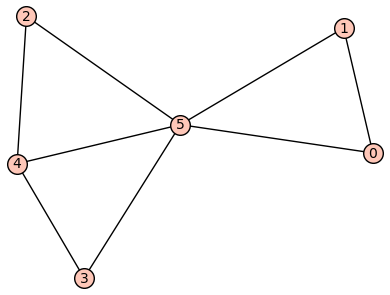


=== n = 7 ===
min alpha_od = 1
število takih grafov = 2
naključno izbran graf:


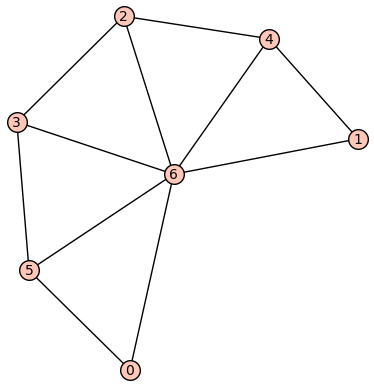


=== n = 8 ===
min alpha_od = 2
število takih grafov = 204
naključno izbran graf:


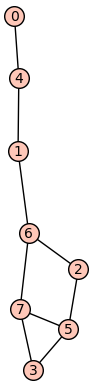


=== n = 9 ===
min alpha_od = 2
število takih grafov = 428
naključno izbran graf:


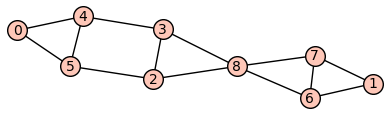


=== n = 10 ===
min alpha_od = 2
število takih grafov = 687
naključno izbran graf:


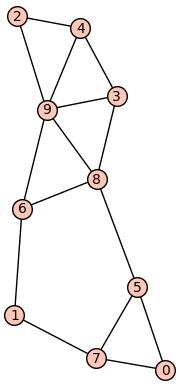

In [43]:
narisi_nakljucni_ekstremni_graf(slovar_zunajravninskih_grafov, n_min=6, n_max=10)

# 4. Generiranje naključnega zunajravninskega grafa na $n$ vozliščih

In [50]:
from sage.graphs.graph import Graph
import random

def random_outerplanar_graph(n, *,
                             min_block_size=3,
                             max_block_size=None,
                             remove_prob=0.17,
                             p_glue_edge=0.6,
                             seed=None):
    """
    Naključen zunajravninski graf na n vozliščih.

    Bloki:
      - zunajravninski blok dobimo kot triangulacijo m-kotnika (dodajanje "uhelj"),
        nato po želji odstranimo nekaj diagonal (zunanji cikel ostane).
    Lepljenje blokov:
      - z verjetnostjo p_glue_edge: nov blok dodamo disjunktno in ga povežemo z obstoječim grafom z ENIM robom (most) -> doda m novih vozlišč.
      - sicer: nov blok zlepimo po ENEM vozlišču (identifikacija) z obstoječim grafom -> doda m-1 novih vozlišč.
    V obeh primerih zunajravninskost ostane.

    Parametri:
      n: št. vozlišč
      min_block_size: min velikost bloka (>=3)
      max_block_size: max velikost bloka (None -> n)
      remove_prob: verjetnost odstranitve posamezne diagonale (ne rob zunanjega cikla)
      p_glue_edge: verjetnost lepljenja "po robu"
      seed: seed
    """
    rng = random.Random(seed)

    # --- trivialni primeri ---
    if n <= 0:
        return Graph()
    if n == 1:
        G = Graph(); G.add_vertex(0); return G
    if n == 2:
        return Graph([(0, 1)])

    # --- parametri velikosti blokov ---
    min_k = max(3, int(min_block_size))
    max_k = n if max_block_size is None else max(int(max_block_size), min_k)

    # --- lokalna funkcija: naredi maksimalen outerplanarni blok (triangulacija) + redčenje ---
    def make_block(m):
        # maksimalen outerplanarni graf (triangulacija m-kotnika)
        B = Graph()
        B.add_vertices(range(m))
        B.add_edges([(0, 1), (1, 2), (2, 0)])  # začetni trikotnik
        outer = [0, 1, 2]                      # vrstni red zunanjega cikla

        for v in range(3, m):
            i = rng.randrange(len(outer))
            a = outer[i]
            b = outer[(i + 1) % len(outer)]
            outer.insert(i + 1, v)
            B.add_edge(a, v)
            B.add_edge(v, b)

        # redčenje: odstrani nekaj diagonal, ampak NE robov zunanjega cikla
        if remove_prob > 0:
            outer_edges = set()
            k = len(outer)
            for i in range(k):
                u = outer[i]
                v = outer[(i + 1) % k]
                outer_edges.add(tuple(sorted((u, v))))

            for (u, v) in list(B.edges(labels=False)):
                e = tuple(sorted((u, v)))
                if e not in outer_edges and rng.random() < remove_prob:
                    B.delete_edge(u, v)

        return B

    # --- start: prvi blok ---
    # Prvi blok naj bo največ n
    m0 = rng.randint(min_k, min(max_k, n))
    G = make_block(m0)          # vozlišča 0...m0-1
    next_id = m0                # naslednje prosto globalno vozlišče

    # --- dodajamo dokler nimamo n vozlišč ---
    while next_id < n:
        remaining = n - next_id

        # Če ostane 1 ali 2 vozlišči, ju dodamo kot liste (mostovi) – še vedno zunajravninski graf
        if remaining < 3:
            for _ in range(remaining):
                attach = rng.choice(list(G.vertices()))
                G.add_vertex(next_id)
                G.add_edge(attach, next_id)
                next_id += 1
            break

        # Odločitev: lepimo po robu ali po vozlišču
        glue_edge = (rng.random() < p_glue_edge)

        if glue_edge:
            # Lepimo po robu: blok bo disjunktno dodan -> doda m novih vozlišč
            m_max = min(max_k, remaining)   # ker doda m
            if m_max < min_k:
                # nimamo prostora za blok >=3: preostalo kot listi
                for _ in range(remaining):
                    attach = rng.choice(list(G.vertices()))
                    G.add_vertex(next_id)
                    G.add_edge(attach, next_id)
                    next_id += 1
                break

            m = rng.randint(min_k, m_max)
            B = make_block(m)

            # relabel: lokalno 0...m-1 -> globalno next_id...next_id+m-1
            B.relabel({v: next_id + v for v in range(m)}, inplace=True)

            # dodaj blok
            G = G.union(B)

            # dodaj EN most med starim delom (id < next_id) in novim blokom
            u = rng.choice([v for v in G.vertices() if v < next_id])
            v = rng.choice([next_id + t for t in range(m)])
            G.add_edge(u, v)

            next_id += m

        else:
            # Lepimo po vozlišču: blok deli 1 vozlišče -> doda m-1 novih vozlišč
            m_max = min(max_k, remaining + 1)  # ker doda m-1 <= remaining => m <= remaining+1
            if m_max < min_k:
                # nimamo prostora za blok >=3: preostalo kot listi
                for _ in range(remaining):
                    attach = rng.choice(list(G.vertices()))
                    G.add_vertex(next_id)
                    G.add_edge(attach, next_id)
                    next_id += 1
                break

            m = rng.randint(min_k, m_max)
            B = make_block(m)

            # izberi globalno "lepilno" vozlišče
            glue_global = rng.choice(list(G.vertices()))
            glue_local = 0  # enostavno: lokalno vozlišče 0 postane glue_global

            # relabel: 0 -> glue_global, ostali dobijo nove ID-je
            mapping = {glue_local: glue_global}
            for v in range(1, m):
                mapping[v] = next_id
                next_id += 1
            B.relabel(mapping, inplace=True)

            # dodaj blok
            G = G.union(B)

    # --- varovalo: točno vozlišča 0...n-1 (če kakšno izolirano slučajno manjka) ---
    G.add_vertices(range(n))
    return G


Preverimo delovanje funkcije za $n = 17$. Hkrati za ta graf z vgrajeno funkcijo *is_circular_planar* preverimo, če je res zunajravninski in preverimo neenakost: $\alpha_{od}(G) \le n/7$.

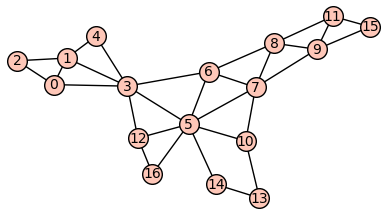

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!


In [51]:
G = random_outerplanar_graph(17)
G.show()
t = G.is_circular_planar()
status = "JE outerplanaren" if t else "NI outerplanaren"
print(f"Graf G {status}!")
alpha = alpha_od(G)
if alpha >= G.order()/7:
    print("alpha_od(G) JE večja ali enaka n/7!")
else:
    print("alpha_od(G) NI večja ali enaka n/7!")    

# 5. Generiranje zunajravninskih grafov in preverjanje zgornje neenakosti za grafe s številom vozlišč med $n$ in $m$

In [49]:
def test_outerplanar_alpha_range(n_min, n_max, *, seed=None):
    """
    Za vsak n v intervalu [n_min, n_max] naredi:
      - generira random_outerplanar_graph(n)
      - prikaže graf
      - preveri outerplanarnost
      - izračuna alpha_od
      - preveri pogoj alpha_od >= n/7
    """
    import random
    rng = random.Random(seed)

    for n in range(n_min, n_max + 1):

        print("\n" + "=" * 14)
        print(f"Test za n = {n}")
        print("=" * 14)

        # generiranje grafa
        G = random_outerplanar_graph(n, seed=rng.randrange(10**18))

        # risanje
        G.plot().show()

        # outerplanarnost
        t = G.is_circular_planar()
        status = "JE outerplanaren" if t else "NI outerplanaren"
        print(f"Graf G {status}!")

        # alpha_od
        alpha = alpha_od(G)
        threshold = G.order() / 7
        # preverjanje pogoja
        if alpha >= threshold:
            print("alpha_od(G) JE večja ali enaka n/7!")
        else:
            print("alpha_od(G) NI večja ali enaka n/7!")

# 6. Pognana funkcija za $n=1$ in $m=50$ in izpis rezultatov


Test za n = 1


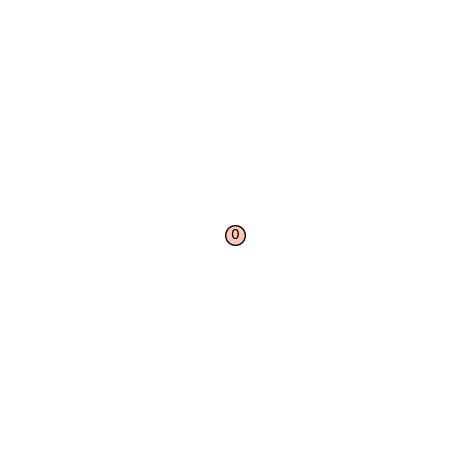

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 2


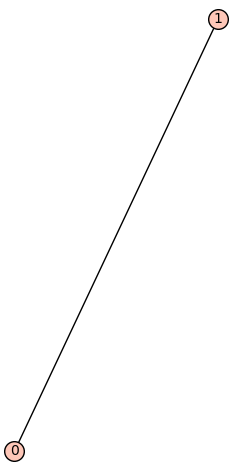

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 3


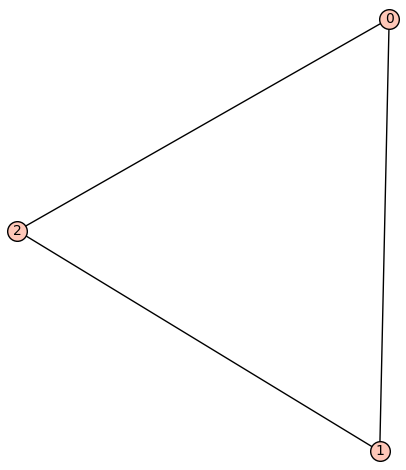

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 4


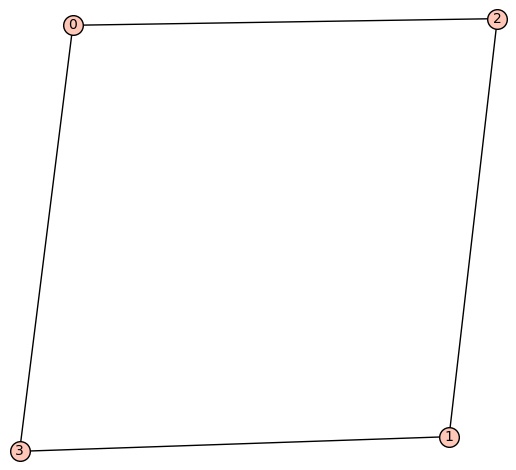

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 5


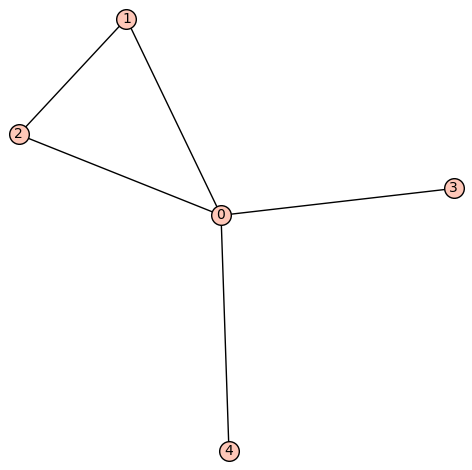

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 6


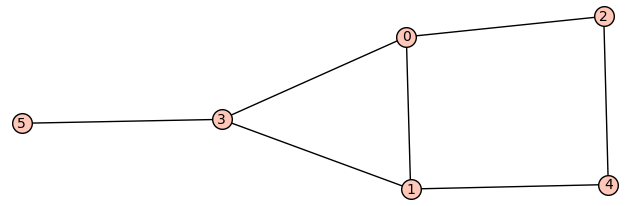

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 7


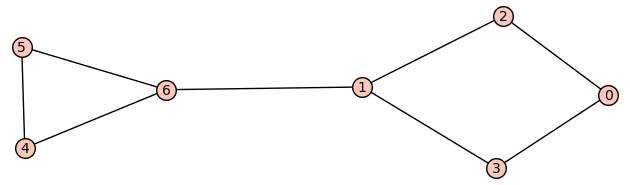

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 8


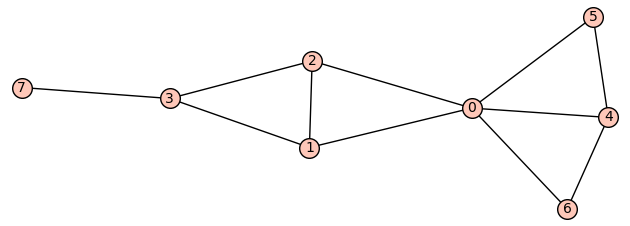

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 9


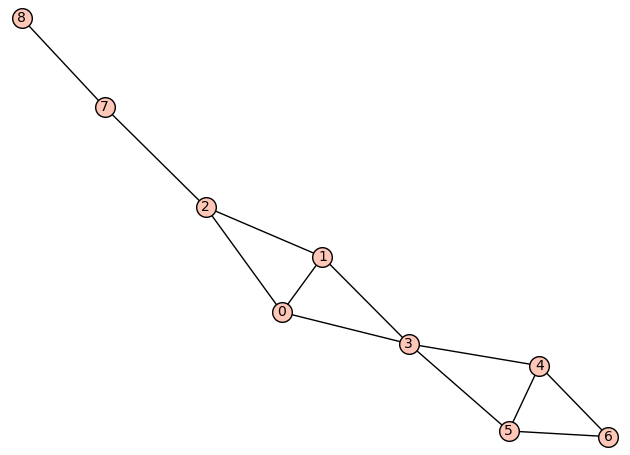

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 10


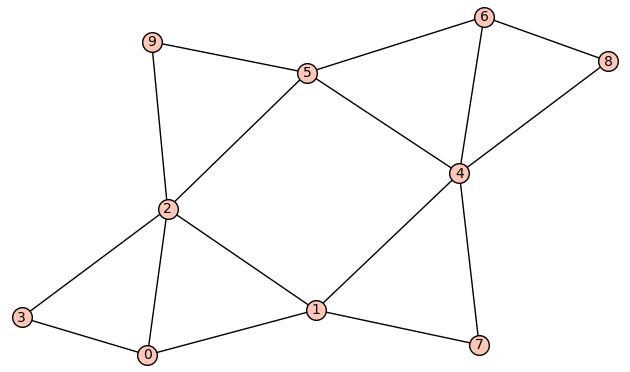

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 11


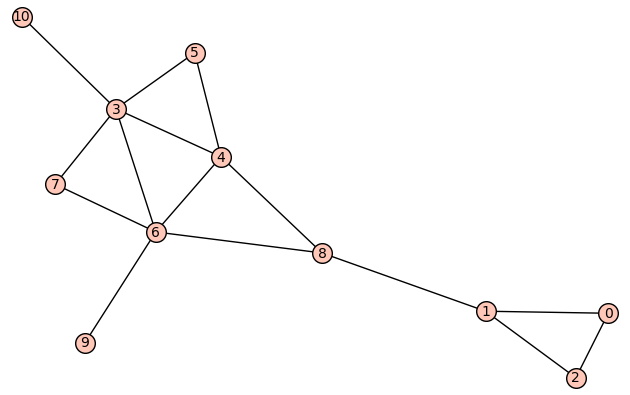

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 12


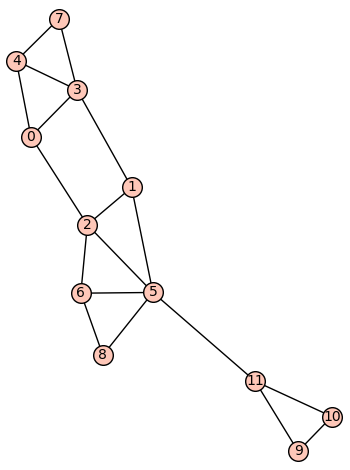

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 13


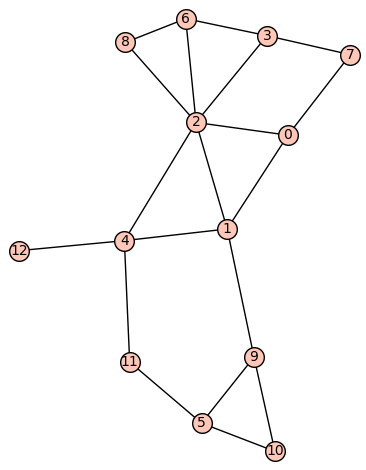

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 14


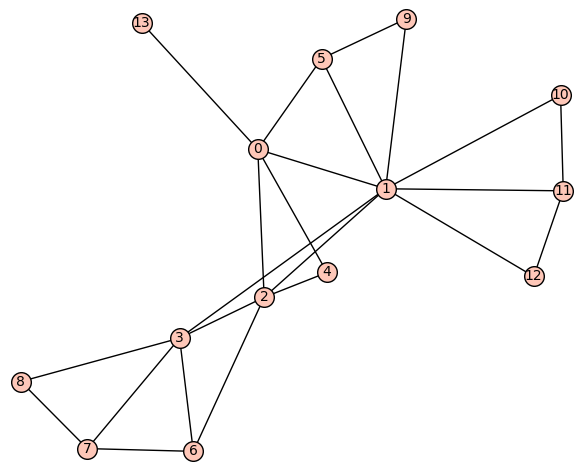

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 15


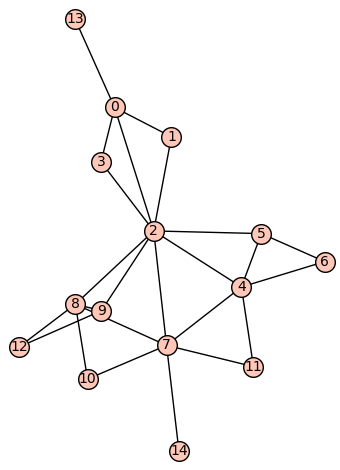

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 16


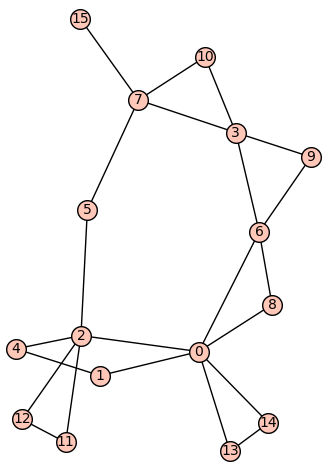

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 17


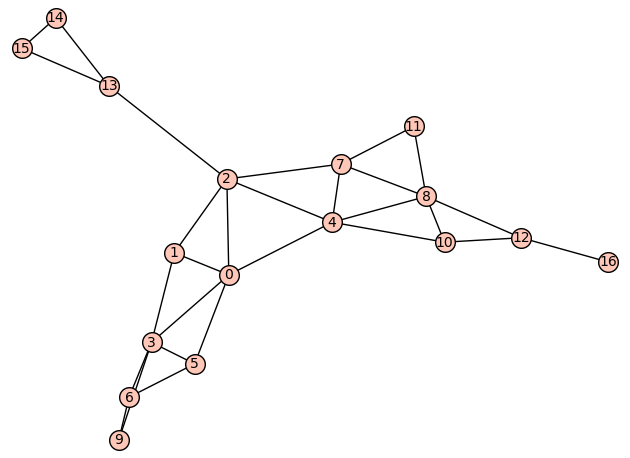

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 18


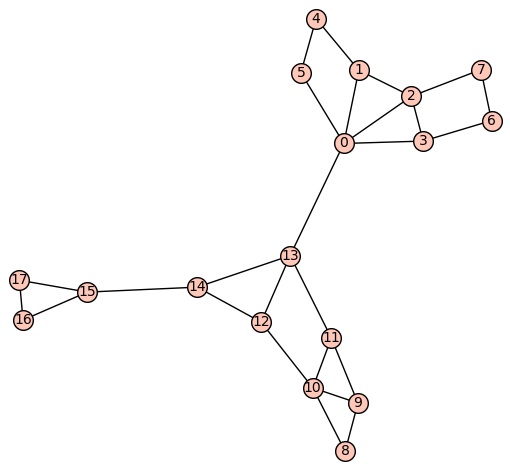

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 19


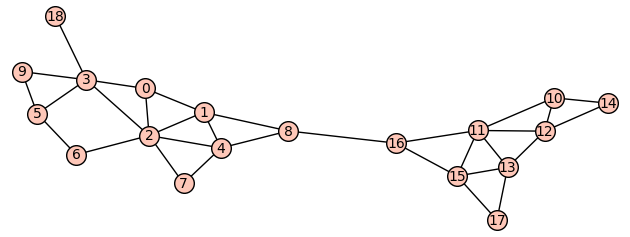

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 20


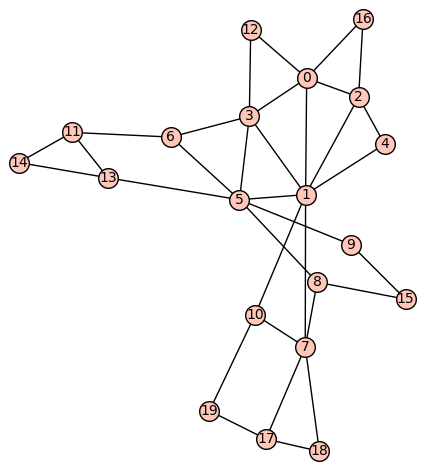

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 21


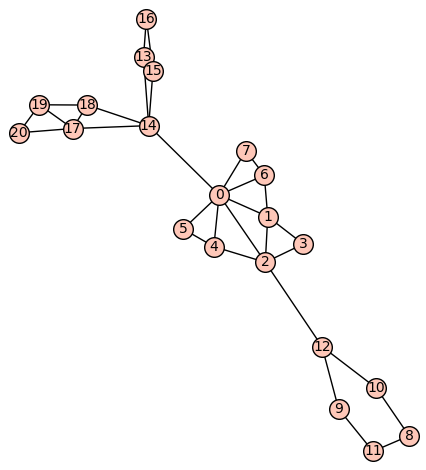

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 22


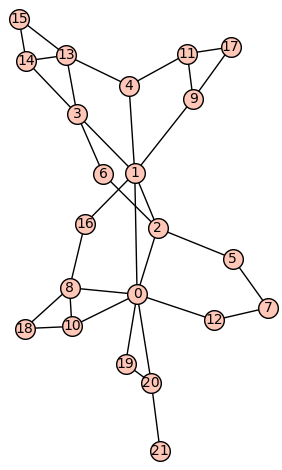

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 23


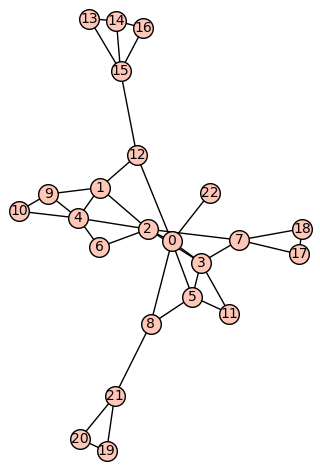

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 24


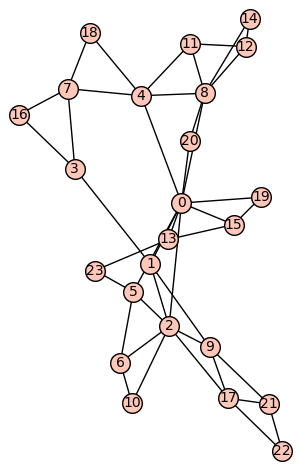

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 25


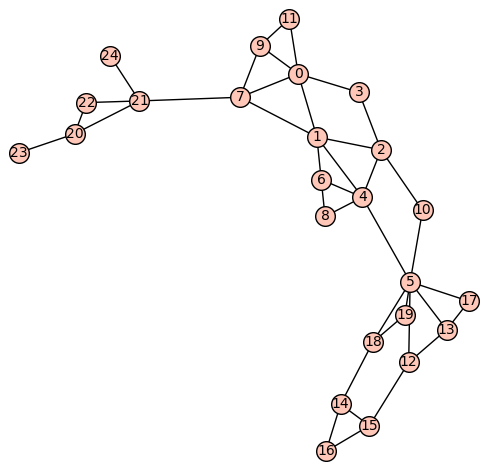

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 26


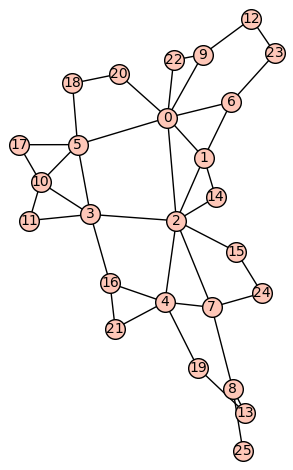

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 27


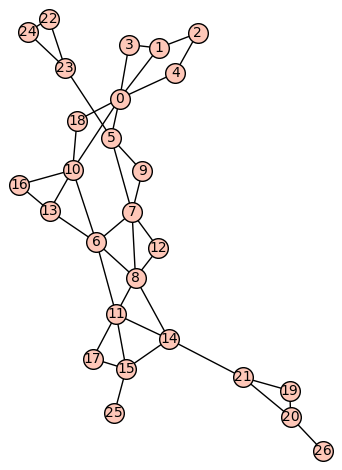

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 28


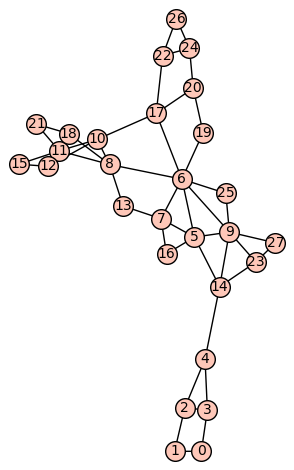

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 29


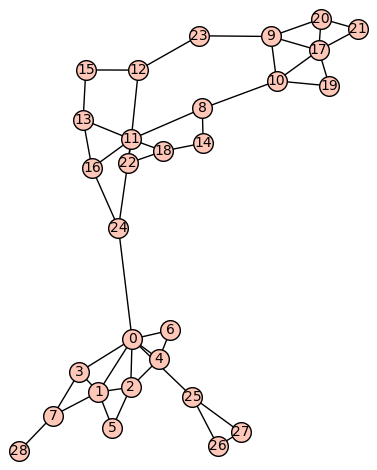

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 30


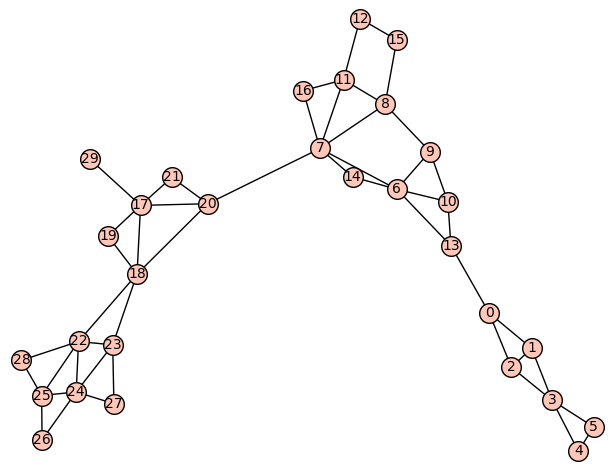

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 31


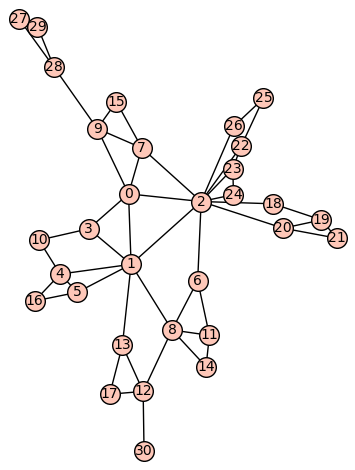

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 32


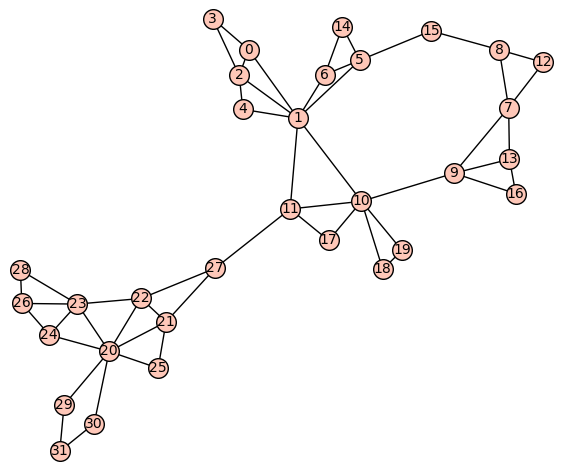

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 33


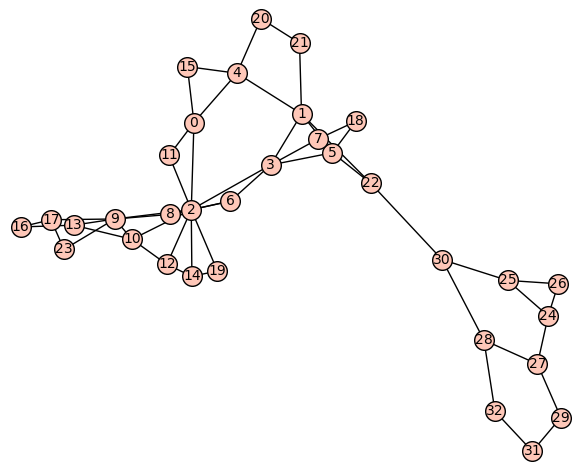

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 34


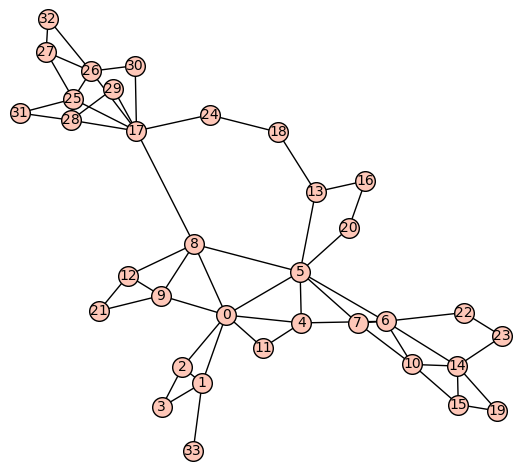

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 35


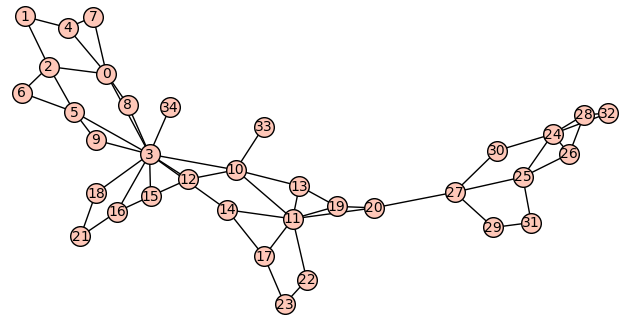

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 36


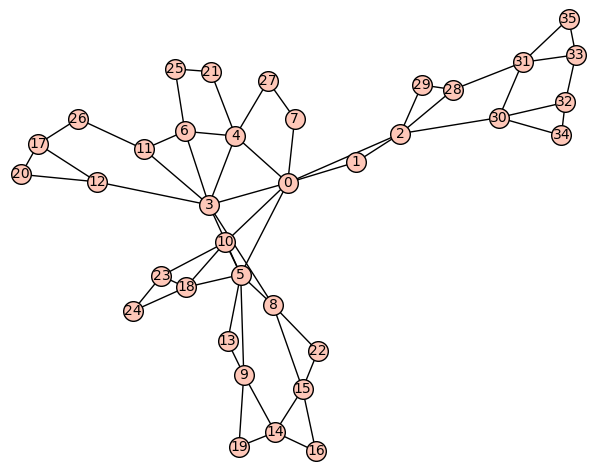

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 37


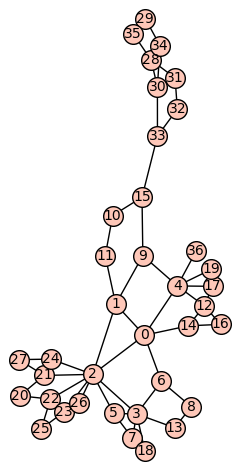

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 38


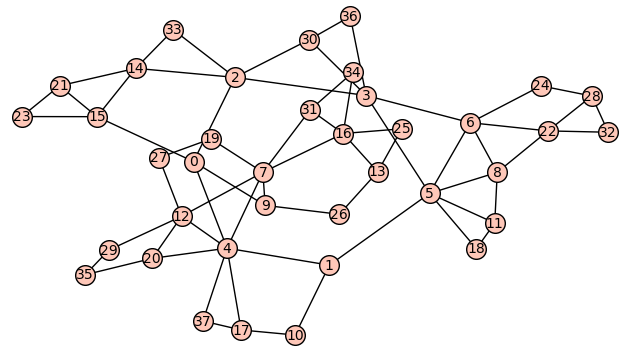

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 39


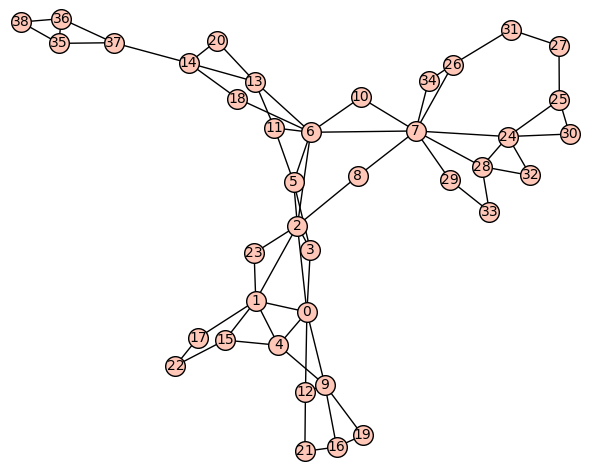

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 40


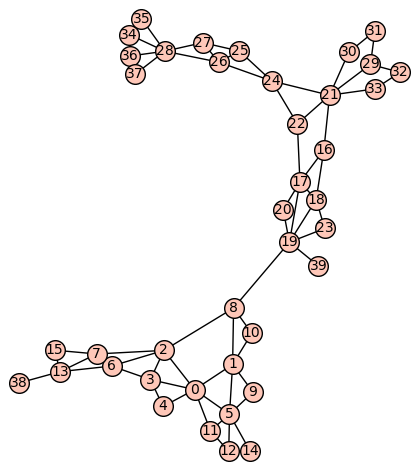

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 41


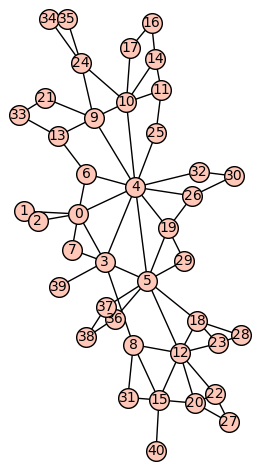

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 42


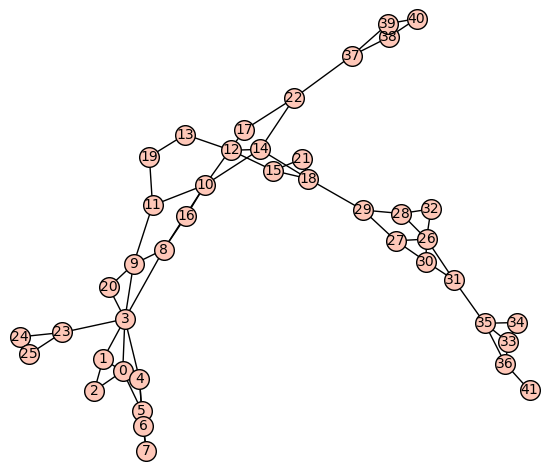

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 43


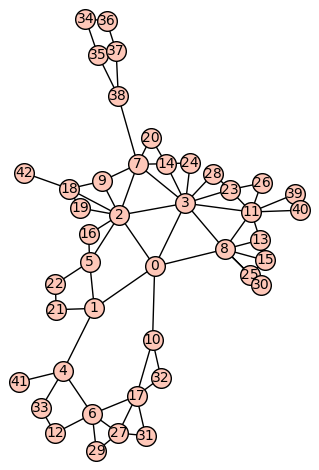

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 44


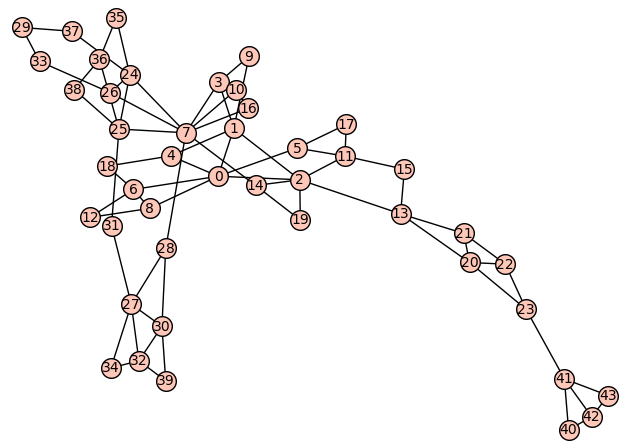

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 45


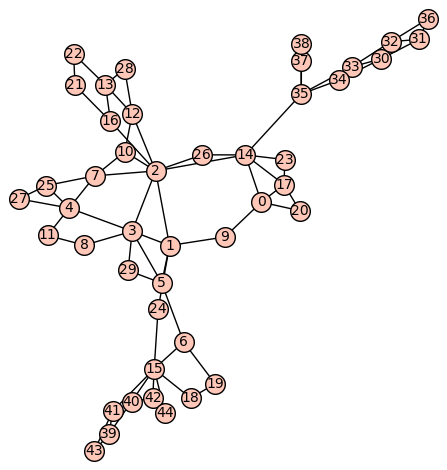

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 46


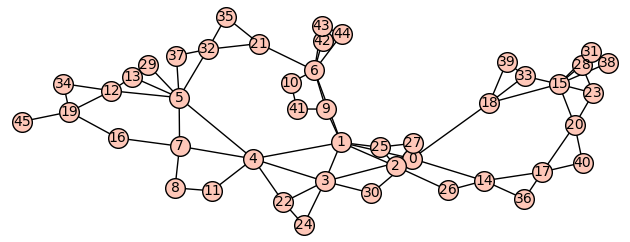

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 47


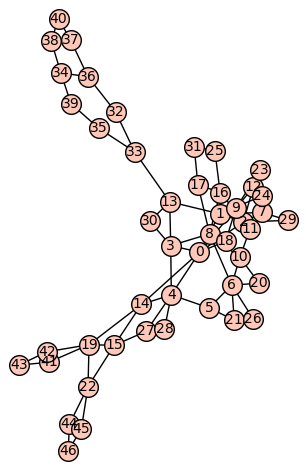

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 48


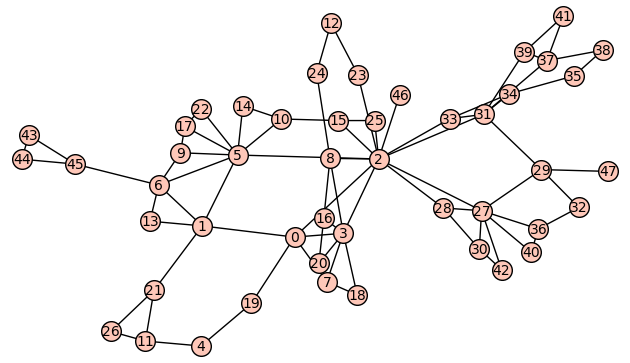

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 49


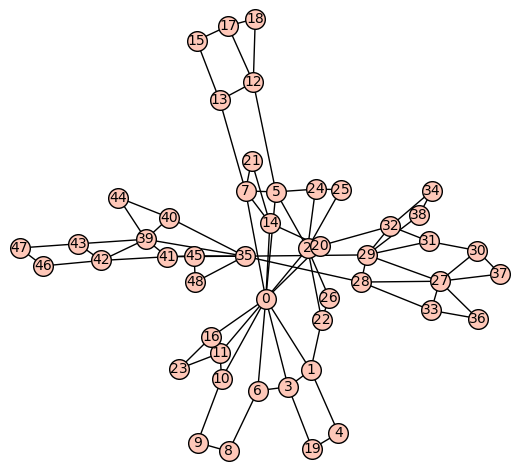

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!

Test za n = 50


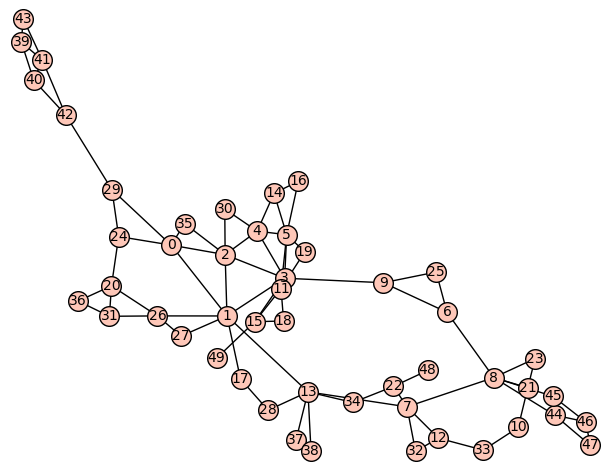

Graf G JE outerplanaren!
alpha_od(G) JE večja ali enaka n/7!


In [36]:
test_outerplanar_alpha_range(1, 50)